In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Carregue o arquivo Parquet
file_path = "C:/Users/kauea/OneDrive/Área de Trabalho/ERROR 404/Faculdade/Estágio/Case/Case/veiculos.parquet"
df = pd.read_parquet(file_path)

In [54]:
# Exemplo de combinar bases
df2 = pd.read_parquet("C:/Users/kauea/OneDrive/Área de Trabalho/ERROR 404/Faculdade/Estágio/Case/Case/cod_pais.parquet")
df2Pais = df2[df2["PAIS"] == "BRASIL"]
print(df2)

df_merged = pd.merge(df, df2, left_on='CodPais', right_on='COD', how='left')
print(df_merged.head())

     COD             PAIS   MERCADO
0    575   UNIAOSOVIETICA  Overseas
1    576  REPUBLICATCHECA  Overseas
2    577          ESPANHA  Overseas
3    579   REPUBLICACHECA  Overseas
4    580  REPUBL.ESLOVACA  Overseas
..   ...              ...       ...
240  565          MADEIRA  Overseas
241  567          ROMENIA  Overseas
242  569           SUEÇIA  Overseas
243  990          LETONIA  Overseas
244  BRA           BRASIL    Brasil

[245 rows x 3 columns]
  Linha CodPais           Denominação        varNED         NP   DTFLI  \
0     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201952986  190109   
1     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201952994  190110   
2     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953001  190110   
3     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953010  190110   
4     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953028  190110   

  DTLCO_1a   DTLCO   DTFAT  COD    PAIS MERCADO  
0   150119  190115  190222  BRA  BRASIL  Brasil  

In [25]:
# Visualize as primeiras linhas
print(df.head())

  Linha CodPais           Denominação        varNED         NP   DTFLI  \
0     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201952986  190109   
1     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201952994  190110   
2     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953001  190110   
3     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953010  190110   
4     J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953028  190110   

  DTLCO_1a DTLCO DTFAT  
0   150119   NaT   NaT  
1   110119   NaT   NaT  
2   100119   NaT   NaT  
3   100119   NaT   NaT  
4   120119   NaT   NaT  


In [4]:
#Verificar colunas e tipos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17233 entries, 0 to 17232
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Linha        17233 non-null  object
 1   CodPais      17233 non-null  object
 2   Denominação  17233 non-null  object
 3   varNED       17233 non-null  object
 4   NP           17233 non-null  object
 5   DTFLI        17233 non-null  object
 6   DTLCO_1a     16397 non-null  object
 7   DTLCO        17233 non-null  object
 8   DTFAT        17233 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB
None


In [6]:
#Verificar estatísticas básicas
print(df.describe())

        Linha CodPais       Denominação        varNED         NP   DTFLI  \
count   17233   17233             17233         17233      17233   17233   
unique      2      26                58           394      17233     292   
top         J     BRA  OF-1721/59 EURO5  QVV17210737B  201952986  000000   
freq    13719   13948              5178          1811          1     826   

       DTLCO_1a   DTLCO   DTFAT  
count     16397   17233   17233  
unique      330     331     315  
top      051219  000000  000000  
freq        108    1418    2353  


In [7]:
#Filtrar apenas veículos de um certo tipo
filtered_df = df[df["Denominação"] == "O-500U 1826/59 EURO5"]
print(filtered_df)

      Linha CodPais           Denominação        varNED         NP   DTFLI  \
0         J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201952986  190109   
1         J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201952994  190110   
2         J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953001  190110   
3         J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953010  190110   
4         J     BRA  O-500U 1826/59 EURO5  QVV18260809B  201953028  190110   
...     ...     ...                   ...           ...        ...     ...   
17208     L     BRA  O-500U 1826/59 EURO5  QVV18260942B  202247445  000000   
17217     L     771  O-500U 1826/59 EURO5  QVV18260914B  202248280  000000   
17222     L     771  O-500U 1826/59 EURO5  QVV18260914B  202248549  000000   
17227     L     771  O-500U 1826/59 EURO5  QVV18260914B  202248794  000000   
17232     L     771  O-500U 1826/59 EURO5  QVV18260914B  202248930  000000   

      DTLCO_1a   DTLCO   DTFAT  
0       150119  190115  190222

In [37]:
#Criar uma coluna calculada (exemplo)
#Garantir que a coluna 'data' é string e tem 6 caracteres
df['DTLCO_1a'] = df['DTLCO_1a'].astype(str).str.zfill(6)

print(df['DTLCO_1a'])

0        150119
1        110119
2        100119
3        100119
4        120119
          ...  
17228    00None
17229    00None
17230    00None
17231    00None
17232    00None
Name: DTLCO_1a, Length: 17233, dtype: object


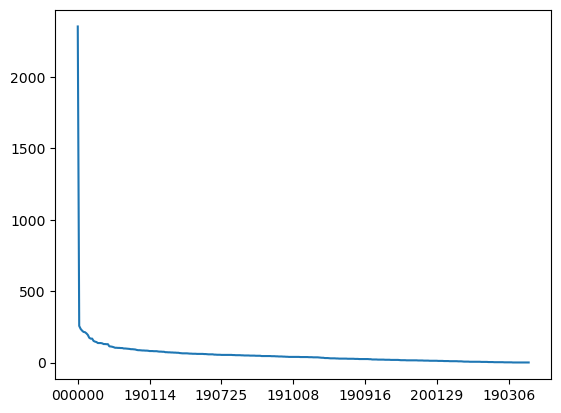

In [40]:
#Cria uma tabela genérica
df["DTFAT"].value_counts().plot(kind="line")
plt.show()